In [13]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [14]:
# Functions

def set_initial_condition(x_row: np.ndarray):
    # U(0, x) = sinx
    return np.sin(x_row)

def set_boundary_condition1(row: np.ndarray):
    # U(t, 0) = 0
    row[0] = 0

def set_boundary_condition2(row: np.ndarray):
    # U(t, 4pi) = 0
    row[-1] = 0

def calculate_X(row: np.ndarray):
    l_X = row.size - 1
    result = np.zeros(l_X)

    for i in range(l_X):
        if (row[i + 1] * row[i]) <= 0:
            result[i] = 0
        elif (row[i + 1] + row[i]) <= 0:
            result[i] = row[i]
        else:
            result[i] = row[i + 1]
    return result

def calculate_Row(prev_row: np.ndarray, X: np.ndarray, t: float,
                  h: float):
    l = prev_row.size
    row = np.zeros(l)
    set_boundary_condition1(row)
    set_boundary_condition2(row)
    
    for i in range(l - 2):
        row[i+1]=((np.square(X[i+1])-np.square(X[i]))/h)*t+prev_row[i+1]
    
    return row

In [15]:
# Inputs and Constants

pi = np.pi

first_x = 0
first_t = 0

last_x = 4 * pi
last_t = 2

h = pi / 10
t = 0.1

In [16]:
x_len = int((last_x - first_x) / h + 1)
t_len = int((last_t - first_t) / t + 1)

In [17]:
x_range = np.linspace(first_x, last_x, x_len)
t_range = np.linspace(first_t, last_t, t_len)

In [18]:
results_G1 = np.zeros((t_len, x_len))
results_G2 = np.zeros((t_len - 1, x_len - 1))

In [19]:
results_G1[-1] = set_initial_condition(x_range)

for i in range(1, t_len):
    results_G2[-i] = calculate_X(results_G1[-i])
    results_G1[- (i + 1)] = calculate_Row(results_G1[-i], results_G2[-i], t, h)

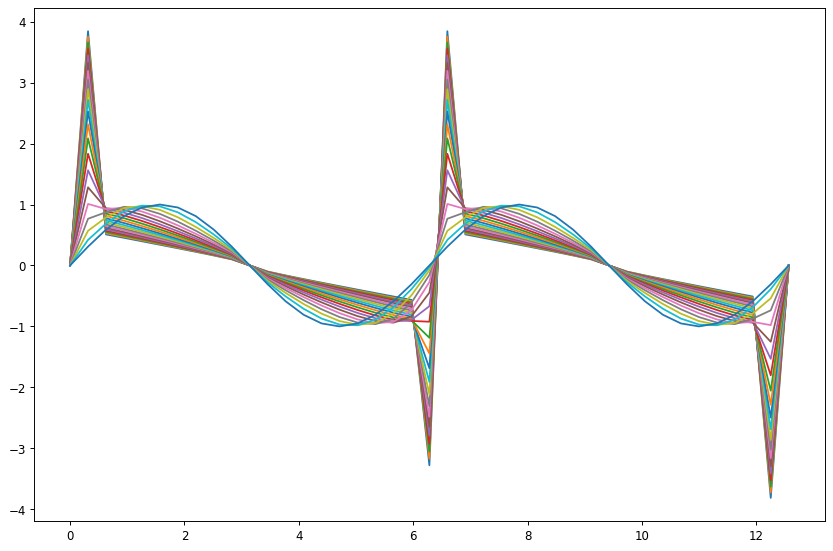

In [20]:
plt.figure(figsize=(12, 8), dpi=85)

plt.plot(x_range, results_G1.T)
plt.show()

In [21]:
a = results_G1.flatten()
a = pd.DataFrame(a, columns=['U'])
a['t'] = [(i//x_len) / 10 for i in range(x_len * t_len)][::-1]
a['x'] = [i%x_len / 10 * pi for i in range(x_len * t_len)]
print(a)

                U    t          x
0    0.000000e+00  2.0   0.000000
1    3.843983e+00  2.0   0.314159
2    5.094117e-01  2.0   0.628319
3    4.535078e-01  2.0   0.942478
4    3.969961e-01  2.0   1.256637
..            ...  ...        ...
856 -9.510565e-01  0.0  11.309734
857 -8.090170e-01  0.0  11.623893
858 -5.877853e-01  0.0  11.938052
859 -3.090170e-01  0.0  12.252211
860 -4.898587e-16  0.0  12.566371

[861 rows x 3 columns]


In [22]:
fig = px.line_3d(a, x="x", y="t", z="U", color='t')

fig.show()

In [23]:
fig = go.Figure(data=[go.Surface(z=results_G1, x=x_range, y=t_range[::-1])])

fig.update_layout(
    title='Surface', autosize=False,
    width=800, height=600,
    scene = dict(
        xaxis_title='x',
        yaxis_title='t',
        zaxis_title='U'
    )
)
fig.update_traces(colorscale = [[0, 'navy'], [1, 'crimson']], selector=dict(type='surface'))

fig.show()

In [25]:
fig = px.line_3d(a, x = "x", y = "t", z = "U", color = 't')

fig.add_trace(go.Surface(z = results_G1, x = x_range, y = t_range[::-1]))

fig.update_traces(colorscale = [[0, 'navy'] , [1, 'crimson']], selector = dict(type = 'surface'))

fig.show()